In [1]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime,date

# File to Load
file_to_load = "Resources/US_Unemployment-state.csv"

headers =['state','filed_week_ended','initial_claim','reflecting_week_ended','continued_claims','covered_employment','insured_unemployment_rate']
dtypes = { 'state':np.str_, 'initial_claim':np.int,'continued_claims':np.int,'covered_employment':np.int,'insured_unemployment_rate':np.float32}
parse_dates = ['filed_week_ended','reflecting_week_ended']

# Read file and store into Pandas data frame
df = pd.read_csv(file_to_load,names=headers, dtype=dtypes,parse_dates=parse_dates,skiprows=1)

# Output File (CSV)
output_data_file = "Resources/cleaned_data.csv"

# Preview of the DataFrame
df.head()

,state,filed_week_ended,initial_claim,reflecting_week_ended,continued_claims,covered_employment,insured_unemployment_rate
0,Alabama,2015-01-03,7785,2014-12-27,30194,1794067,1.68
1,Alabama,2015-01-10,9139,2015-01-03,35246,1798083,1.96
2,Alabama,2015-01-17,4654,2015-01-10,28200,1798083,1.57
3,Alabama,2015-01-24,3284,2015-01-17,26222,1798083,1.46
4,Alabama,2015-01-31,3203,2015-01-24,25391,1798083,1.41


In [2]:
# Check for correct data types
df.dtypes

state                                object
filed_week_ended             datetime64[ns]
initial_claim                         int32
reflecting_week_ended        datetime64[ns]
continued_claims                      int32
covered_employment                    int32
insured_unemployment_rate           float32
dtype: object

In [6]:
# Check column names for spaces 
df.columns

Index(['state', 'filed_week_ended', 'initial_claim', 'reflecting_week_ended',
       'continued_claims', 'covered_employment', 'insured_unemployment_rate'],
      dtype='object')

In [7]:
# Identify incomplete rows
df.count()

state                        14946
filed_week_ended             14946
initial_claim                14946
reflecting_week_ended        14946
continued_claims             14946
covered_employment           14946
insured_unemployment_rate    14946
dtype: int64

In [8]:
# Drop all rows with missing information
# df = unemployment_df.dropna(how='any')

In [9]:
# Verify dropped rows if any
df.count()

state                        14946
filed_week_ended             14946
initial_claim                14946
reflecting_week_ended        14946
continued_claims             14946
covered_employment           14946
insured_unemployment_rate    14946
dtype: int64

In [10]:
# Check states values
df['state'].value_counts()

Louisiana               282
Ohio                    282
New Hampshire           282
Texas                   282
Oklahoma                282
Arizona                 282
Oregon                  282
California              282
Idaho                   282
Tennessee               282
Iowa                    282
Kansas                  282
Connecticut             282
South Carolina          282
Wyoming                 282
Illinois                282
North Carolina          282
New Jersey              282
Wisconsin               282
Montana                 282
Nevada                  282
Rhode Island            282
Colorado                282
Maine                   282
Maryland                282
Michigan                282
West Virginia           282
Washington              282
District of Columbia    282
Minnesota               282
Kentucky                282
Virgin Islands          282
Delaware                282
Puerto Rico             282
Pennsylvania            282
New Mexico          

In [11]:
# Display a statistical overview for a high level insight into the data
df.describe()

,initial_claim,continued_claims,covered_employment,insured_unemployment_rate
count,1.494600e+04,1.494600e+04,1.494600e+04,14946.000000
mean,6.943296e+03,4.564290e+04,2.642809e+06,1.667128
std,2.380269e+04,1.088439e+05,2.999574e+06,2.032472
min,0.000000e+00,0.000000e+00,3.244600e+04,0.000000
25%,1.094000e+03,8.666000e+03,6.529340e+05,0.850000
50%,2.550000e+03,1.991950e+04,1.797624e+06,1.240000
75%,5.608750e+03,4.008000e+04,3.266242e+06,1.830000
max,1.058325e+06,4.808361e+06,1.733001e+07,31.200001


In [12]:
df.head()

,state,filed_week_ended,initial_claim,reflecting_week_ended,continued_claims,covered_employment,insured_unemployment_rate
0,Alabama,2015-01-03,7785,2014-12-27,30194,1794067,1.68
1,Alabama,2015-01-10,9139,2015-01-03,35246,1798083,1.96
2,Alabama,2015-01-17,4654,2015-01-10,28200,1798083,1.57
3,Alabama,2015-01-24,3284,2015-01-17,26222,1798083,1.46
4,Alabama,2015-01-31,3203,2015-01-24,25391,1798083,1.41


In [13]:
# Add two more columns to the dataframe for displaying filed month and year separately
df['filed_ended_month'] = df['filed_week_ended'].dt.month.map("{:02}".format)
df['filed_ended_year'] = df['filed_week_ended'].dt.year.astype(str)

In [14]:
df.head()

,state,filed_week_ended,initial_claim,reflecting_week_ended,continued_claims,covered_employment,insured_unemployment_rate,filed_ended_month,filed_ended_year
0,Alabama,2015-01-03,7785,2014-12-27,30194,1794067,1.68,01,2015
1,Alabama,2015-01-10,9139,2015-01-03,35246,1798083,1.96,01,2015
2,Alabama,2015-01-17,4654,2015-01-10,28200,1798083,1.57,01,2015
3,Alabama,2015-01-24,3284,2015-01-17,26222,1798083,1.46,01,2015
4,Alabama,2015-01-31,3203,2015-01-24,25391,1798083,1.41,01,2015


In [15]:
# Rename the columns and generate a new dataframe aggregating all the weekly claims to a month, per state
d = {'initial_claim':'monthly_initial_claim', 'average_continued_claims':'continued_claims','insured_unemployment_rate':'average_insured_unemployment_rate'}
df_3 = df.groupby(['state','filed_ended_year','filed_ended_month']).agg({'initial_claim':'sum','continued_claims':'mean','insured_unemployment_rate':'mean'}).rename(columns=d).reset_index()
df_3.head()

,state,filed_ended_year,filed_ended_month,monthly_initial_claim,continued_claims,average_insured_unemployment_rate
0,Alabama,2015,01,28065,29050.60,1.6160
1,Alabama,2015,02,12777,24491.75,1.3625
2,Alabama,2015,03,13023,23454.25,1.3050
3,Alabama,2015,04,14475,22520.00,1.2500
4,Alabama,2015,05,17966,22709.20,1.2600


In [16]:
df_3.dtypes

state                                 object
filed_ended_year                      object
filed_ended_month                     object
monthly_initial_claim                  int32
continued_claims                     float64
average_insured_unemployment_rate    float32
dtype: object

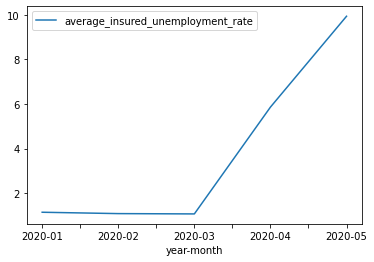

In [17]:
# Generate test plots
df_3['year-month'] =  df_3['filed_ended_year'] + "-" + df_3['filed_ended_month']
df_3= df_3.sort_values(['state','year-month'])
condition = (df_3['state']=='Texas') & (df_3['filed_ended_year'].isin(['2020']))
df_3[condition].plot(x='year-month',y='average_insured_unemployment_rate')

In [18]:
df_3.head()

,state,filed_ended_year,filed_ended_month,monthly_initial_claim,continued_claims,average_insured_unemployment_rate,year-month
0,Alabama,2015,01,28065,29050.60,1.6160,2015-01
1,Alabama,2015,02,12777,24491.75,1.3625,2015-02
2,Alabama,2015,03,13023,23454.25,1.3050,2015-03
3,Alabama,2015,04,14475,22520.00,1.2500,2015-04
4,Alabama,2015,05,17966,22709.20,1.2600,2015-05


In [19]:
# Generate a new dataframe by re-orienting the original data frame using pd.melt
df_2 = pd.melt(df,id_vars=['state','filed_week_ended'],value_vars=['initial_claim','continued_claims','covered_employment','insured_unemployment_rate'])

In [20]:
df_2.columns

Index(['state', 'filed_week_ended', 'variable', 'value'], dtype='object')

In [21]:
df_2.shape

(59784, 4)

In [22]:
df_2.dtypes

state                       object
filed_week_ended    datetime64[ns]
variable                    object
value                      float64
dtype: object

In [23]:
df_2['filed_week_ended'].dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
59779    2020
59780    2020
59781    2020
59782    2020
59783    2020
Name: filed_week_ended, Length: 59784, dtype: int64

In [24]:
# Visualize the dataframe
# import dtale 
# d = dtale.show(df_3, ignore_duplicate=True)
# d.open_browser()

In [27]:
from flask import (
    Flask,
    render_template,
    jsonify,
    request,
    redirect)

In [26]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///resources/us_unemployment.db', echo=False)
df.to_sql('state_claims',con=engine,if_exists='replace')

In [31]:
data = [{
    'state':{
        
        name:['Texas',
        year=['2001','2002'],
        data=[123,456]
             ]
    }
}
       ]

jsonify(data)

SyntaxError: invalid syntax (<ipython-input-31-e9cf5b036d0b>, line 5)